In [ ]:
## A skeleton for implementing Naive Bayes Classifier in Python.
## Author: Md Faisal Kabir
## Spring 2025

## Final implementation by: Joseph Cooper
## Check for updates at: https://github.com/Qhwelah/naive-bayes-program-cmpsc445.git
## CMPSC 445 - HW4

import numpy
import random
import time
import pandas
import math

# Change these file names to swap programs
# Specify if the attributes are continuous (cont) or categorical (cat)
# (Uncomment/Recomment the relevant lines for whichever dataset/type you want to see)

# trainingFile = "irisTraining.txt"
# testingFile = "irisTesting.txt"
# attributeType = "cont" 

trainingFile = "buyTraining.txt"
testingFile = "buyTesting.txt"
attributeType = "cat" 


# Xtrain = numpy.loadtxt(trainingFile)
XtrainPandas = pandas.read_csv(trainingFile, sep=' ')

n = XtrainPandas.shape[0]
d = XtrainPandas.shape[1]-1
print(n, d)

14 4


In [59]:
#Training... Collect mean and standard deviation for each dimension for each class..
#Also, calculate P(C+) and P(C-)


## --- CONTINUOUS VALUE DEFINTIIONS ---
# a list for tracking which column is which in the following lists
col_labels = []

# value trackers for classification -1
col_mean_vals_cn1 = []  
col_stddev_vals_cn1 = []

# value trackers for classification +1
col_mean_vals_cp1 = []  
col_stddev_vals_cp1 = []


## --- CATEGORICAL VALUE DEFINTIIONS ---
col_labels = []
neg_count_totals = [] 
pos_count_totals = []
# A is index 0, B is 1, C is 2
negTotal = -1
posTotal = -1

SplitXtrain = dict(tuple(XtrainPandas.groupby('Classification')))
# print(SplitXtrain[-1])
# print()
# print(SplitXtrain[1])

if(attributeType == "cont"):
    #print(XtrainPandas)
    print("Continuous Attribute Type")

    for col in SplitXtrain[-1]:
        if(col == 'Classification'):
            #print(f"skipping {col}")
            break
        col_labels.append(col)
        col_mean_vals_cn1.append(SplitXtrain[-1][col].mean())
        col_stddev_vals_cn1.append(SplitXtrain[-1][col].std())
        print(f"{col} for classification -1: mean {col_mean_vals_cn1[len(col_mean_vals_cn1)-1]}" \
            + f", stddev {col_stddev_vals_cn1[len(col_stddev_vals_cn1)-1]}\n")
    
    print('-----------------------------')
    
    for col in SplitXtrain[1]:
        if(col == 'Classification'):
            #print(f"skipping {col}")
            break
        col_mean_vals_cp1.append(SplitXtrain[1][col].mean())
        col_stddev_vals_cp1.append(SplitXtrain[1][col].std())
        print(f"{col} for classification 1: mean {col_mean_vals_cp1[len(col_mean_vals_cp1)-1]}" \
            + f", stddev {col_stddev_vals_cp1[len(col_stddev_vals_cp1)-1]}\n")
        
    # i = 0
    # while(i < len(col_mean_vals_cn1)):
    #     #make the percentage calculations
    #     temp1 = (1/math.sqrt(2*math.pi*((col_stddev_vals_cn1)**2)))
    #     temp2 = math.exp((-(1)))

if(attributeType == "cat"):
    print(f"Categorical Attribute Type")
    print("Classification: -1")
    for col in SplitXtrain[-1]:
        if(col == "Classification"):
            break
        col_labels.append(col)
        amt_1 = SplitXtrain[-1][col][SplitXtrain[-1][col] == 1].count()
        amt_2 = SplitXtrain[-1][col][SplitXtrain[-1][col] == 2].count()
        amt_3 = SplitXtrain[-1][col][SplitXtrain[-1][col] == 3].count()
        print(f"{col}: type 1: {amt_1}, type 2: {amt_2}, type 3: {amt_3}")
        colCount = [amt_1, amt_2, amt_3]
        neg_count_totals.append(colCount)
        negTotal = len(SplitXtrain[-1])
    
    print()
    print("Classification: +1")
    for col in SplitXtrain[1]:
        if(col == "Classification"):
            break
        amt_1 = SplitXtrain[1][col][SplitXtrain[1][col] == 1].count()
        amt_2 = SplitXtrain[1][col][SplitXtrain[1][col] == 2].count()
        amt_3 = SplitXtrain[1][col][SplitXtrain[1][col] == 3].count()
        print(f"{col}: type 1: {amt_1}, type 2: {amt_2}, type 3: {amt_3}")
        colCount = [amt_1, amt_2, amt_3]
        pos_count_totals.append(colCount)
        posTotal = len(SplitXtrain[1])

    print()
    print(f"Negative classification counts: {neg_count_totals}")
    print(f"Positive classification counts: {pos_count_totals}")

print("--------------------")

def predict_classification_cont(whichCol, colValue):
    # Returns a tuple containing the prediction for a negative and a positive classification 
    # In other words, calculates and returns P(C-) and P(C+) for an entry
    
    # # Validation code:
    # col_mean_vals_cn1[whichCol] = 90
    # col_stddev_vals_cn1[whichCol] = math.sqrt(25)
    # col_mean_vals_cp1[whichCol] = 110
    # col_stddev_vals_cp1[whichCol] = math.sqrt(2975)

    temp1 = (1/math.sqrt(2*math.pi*((col_stddev_vals_cn1[whichCol])**2)))
    temp2 = math.exp(-((colValue - col_mean_vals_cn1[whichCol]) ** 2) / (2*((col_stddev_vals_cn1[whichCol])**2)))
    nPred = temp1 * temp2

    temp3 = (1/math.sqrt(2*math.pi*((col_stddev_vals_cp1[whichCol])**2)))
    temp4 = math.exp(-((colValue - col_mean_vals_cp1[whichCol]) ** 2) / (2*((col_stddev_vals_cp1[whichCol])**2)))
    pPred = temp3 * temp4

    resTuple = (nPred, pPred)
    return resTuple

def predict_classification_cat(whichCol, colValue):
    # Predicts the negative and positive probabilities for this entry
    # In other workds, returns P(C-) and P(C+) for an entry

    # whichCol is the index of the column name that we are predicting with
    # colValue is the index of the train entry's current value that we feed in to make the prediciton

    #negProb = 0
    temp1 = neg_count_totals[whichCol][colValue]
    negProb = temp1 / negTotal

    #posProb = 0
    temp2 = pos_count_totals[whichCol][colValue]
    posProb = temp2 / posTotal

    retVal = (negProb, posProb)
    return(retVal)

# print(f"Predicting classification for column 1 and column value 120:")
# print(f"{predict_classification_cont(1, 120)}")


Categorical Attribute Type
Classification: -1
A: type 1: 3, type 2: 0, type 3: 2
B: type 1: 2, type 2: 1, type 3: 2
C: type 1: 1, type 2: 4, type 3: 0
D: type 1: 2, type 2: 3, type 3: 0

Classification: +1
A: type 1: 2, type 2: 4, type 3: 3
B: type 1: 3, type 2: 4, type 3: 2
C: type 1: 6, type 2: 3, type 3: 0
D: type 1: 6, type 2: 3, type 3: 0

Negative classification counts: [[3, 0, 2], [2, 1, 2], [1, 4, 0], [2, 3, 0]]
Positive classification counts: [[2, 4, 3], [3, 4, 2], [6, 3, 0], [6, 3, 0]]
--------------------


In [60]:
#Testing .....
# Xtest = numpy.loadtxt(testingFile)
Xtest = pandas.read_csv(testingFile, sep=' ')
nn = Xtest.shape[0] # Number of points in the testing data.
print(nn)

# print(Xtest)

# List to contain all the final predictions of each entry
finalPredictions = []
actualClass = []

tp = 0 #True Positive
fp = 0 #False Positive
tn = 0 #True Negative
fn = 0 #False Negative


#Iterate over all points in testing data
  #For each point find the P(C+|Xi) and P(C-|Xi) and decide if the point belongs to C+ or C-..
  #Recall we need to calculate P(Xi|C+)*P(C+) ..
  #P(Xi|C+) = P(Xi1|C+) * P(Xi2|C+)....P(Xid|C+)....Do the same for P(Xi|C-)
  #Now that you've calculate P(Xi|C+) and P(Xi|C-), we can decide which is higher 
  #P(Xi|C-)*P(C-) or P(Xi|C-)*P(C-) ..
  #increment TP,FP,FN,TN accordingly, remember the true lable for the ith point is in Xtest[i,d]

#}

#Calculate all the measures required.

if(attributeType == "cont"):
    j = 0
    while(j < nn):
        # Prediction for classification of -1, or P(C-)
        pred_n1 = []
        # Prediction for classification of +1, or P(C+)
        pred_p1 = []

        currentCol = Xtest.loc[j]
        print(f"Predicting classification for entry {j}")
        i = 0
        while(i < len(col_labels)):
            # print(f"current column: {col_labels[i]}")
            # print(f"Predicting {i}, {currentCol[col_labels[i]]}")
            predictions = predict_classification_cont(i, currentCol[col_labels[i]])
            pred_n1.append(predictions[0])
            pred_p1.append(predictions[1])
            i += 1
        # print(f"negative predictions: {pred_n1}\npositive predicitons: {pred_p1}")
        pn1 = math.prod(pred_n1)
        pp1 = math.prod(pred_p1)
        # print(f"Product of negative preds: {pn1} and of positive preds: {pp1}")
        finalPred = 0
        if(pn1 >= pp1):
            finalPred = -1
        elif(pn1 < pp1):
            finalPred = 1
        print(f"final prediction: {finalPred}")
        finalPredictions.append(finalPred)
        actual = currentCol['Classification']
        actualClass.append(actual)
        print(f"actual classification: {actual}")
        
        if(finalPred == actual):
            if(finalPred == 1):
                tp += 1
            elif(finalPred == -1):
                tn += 1
        elif(finalPred != actual):
            if(finalPred == 1):
                fp += 1
            elif(finalPred == -1):
                fn += 1
        print()
        j += 1

if(attributeType == "cat"):
    print("Categorical Type")
    j = 0
    while(j < nn):
        # Prediction for classification of -1, or P(C-)
        pred_n1 = []
        # Prediction for classification of +1, or P(C+)
        pred_p1 = []

        currentCol = Xtest.loc[j]
        print(f"Predicting classification for entry {j}")
        # print(f"column values: {currentCol}")
        i = 0
        while(i < len(col_labels)):
            # print(f"Predicting {i}, {currentCol[col_labels[i]]-1}")
            predictions = predict_classification_cat(i, currentCol[col_labels[i]]-1)
            pred_n1.append(predictions[0])
            pred_p1.append(predictions[1])
            i += 1

        print(f"negative predictions: {pred_n1}\npositive predicitons: {pred_p1}")
        pn1 = math.prod(pred_n1)
        pp1 = math.prod(pred_p1)
        print(f"Product of negative preds: {pn1} and of positive preds: {pp1}")
        finalPred = 0
        if(pn1 >= pp1):
            finalPred = -1
        elif(pn1 < pp1):
            finalPred = 1
        print(f"final prediction: {finalPred}")
        finalPredictions.append(finalPred)
        actual = currentCol['Classification']
        actualClass.append(actual)
        print(f"actual classification: {actual}")
        
        if(finalPred == actual):
            if(finalPred == 1):
                tp += 1
            elif(finalPred == -1):
                tn += 1
        elif(finalPred != actual):
            if(finalPred == 1):
                fp += 1
            elif(finalPred == -1):
                fn += 1
        print()
        j += 1
    
    


4
Categorical Type
Predicting classification for entry 0
negative predictions: [0.4, 0.2, 0.2, 0.4]
positive predicitons: [0.3333333333333333, 0.4444444444444444, 0.6666666666666666, 0.6666666666666666]
Product of negative preds: 0.006400000000000002 and of positive preds: 0.06584362139917695
final prediction: 1
actual classification: -1

Predicting classification for entry 1
negative predictions: [0.4, 0.2, 0.2, 0.6]
positive predicitons: [0.3333333333333333, 0.4444444444444444, 0.6666666666666666, 0.3333333333333333]
Product of negative preds: 0.009600000000000003 and of positive preds: 0.03292181069958847
final prediction: 1
actual classification: 1

Predicting classification for entry 2
negative predictions: [0.6, 0.2, 0.8, 0.6]
positive predicitons: [0.2222222222222222, 0.4444444444444444, 0.3333333333333333, 0.3333333333333333]
Product of negative preds: 0.0576 and of positive preds: 0.010973936899862823
final prediction: -1
actual classification: -1

Predicting classification fo

Final results: 
true positive: 2 
false positive: 1 
true negative: 1 
false negative: 0

Accuracy: 0.75
Precision: 0.6666666666666666
Recall: 1.0
F1: 0.8

Confusion Matrix:


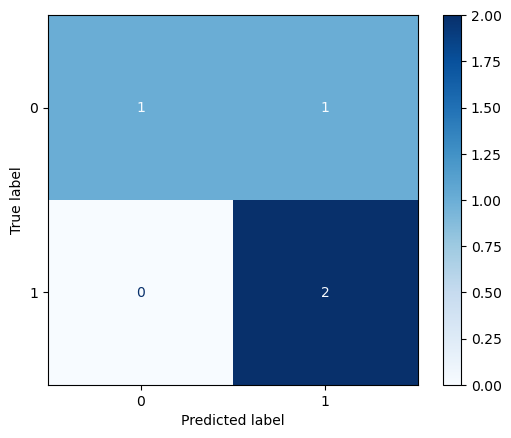

In [61]:
# Analysis:
print(f"Final results: \ntrue positive: {tp} \nfalse positive: {fp} \n" \
      + f"true negative: {tn} \nfalse negative: {fn}")

accuracy = (tp+tn) / (tp+fp+tn+fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = (2*precision*recall) / (precision + recall)

print()
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

import matplotlib.pyplot as plt
from sklearn import metrics
print()
# print(finalPredictions)
# print(actualClass)

print("Confusion Matrix:")
conf_matrix = metrics.confusion_matrix(actualClass, finalPredictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0,1])

cm_display.plot(cmap='Blues', colorbar=True)
plt.show()
